# **21. BERT pretrained model 제작 [프로젝트]**
<br>

# **21-1. 프로젝트 : mini BERT 만들기**
<br>

### **라이브러리 버전 확인**
<br>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import json
import re

In [ ]:
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(json.__version__)
print(re.__version__)

2.13.0
1.23.5
1.5.3
3.7.1
2.0.9
2.2.1


<br><br>

### **1. Tokenizer 준비**
<br>

SentencePiece 모델을 이용해 BERT의 MLM 학습용 데이터를 만드세요.

이를 위해 한글 나무 위키 코퍼스로부터 8000의 vocab_size를 갖는 sentencepiece 모델을 만들어 보세요.

BERT에 사용되는 주요 특수문자가 vocab에 포함되어야 합니다.

<br>

In [ ]:
# 토크나이저 생성

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/data

bert_pre_train.json  kowiki.txt


In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00


In [ ]:
import sentencepiece as spm
import os
corpus_file = '/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/data/kowiki.txt'
prefix = 'ko_8000'
vocab_size = 8000

spm.SentencePieceTrainer.train(
    f"--input={corpus_file} --model_prefix={prefix} --vocab_size={vocab_size + 7}" +
    " --model_type=bpe" +
    " --max_sentence_length=999999" +  # 문장 최대 길이
    " --pad_id=0 --pad_piece=[PAD]" +  # pad (0)
    " --unk_id=1 --unk_piece=[UNK]" +  # unknown (1)
    " --bos_id=2 --bos_piece=[BOS]" +  # begin of sequence (2)
    " --eos_id=3 --eos_piece=[EOS]" +  # end of sequence (3)
    " --user_defined_symbols=[SEP],[CLS],[MASK]")  # 사용자 정의 토큰

<br>

In [ ]:
# 토크나이저 저장/이동

In [ ]:
import shutil

# 복사할 파일의 경로
src1 = "/content/ko_8000.model"
src2 = "/content/ko_8000.vocab"

# 목적지 경로
dest1 = "/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models/ko_8000.model"
dest2 = "/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models/ko_8000.vocab"

# 파일 복사
shutil.copy(src1, dest1)
shutil.copy(src2, dest2)

'/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models/ko_8000.vocab'

In [ ]:
!ls /content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models

bert_pre_train.hdf5  ko_32000.vocab  ko_8000.vocab
ko_32000.model	     ko_8000.model


<br>

In [ ]:
# vocab loading

In [ ]:
model_dir ='/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models'

In [ ]:
vocab = spm.SentencePieceProcessor()
vocab.load(f"{model_dir}/ko_8000.model")

True

<br>

In [ ]:
# 토크나이저 테스트:  특수 token 7개를 제외한 나머지 tokens 출력

In [ ]:
vocab_list = []
for id in range(7, len(vocab)):
        if not vocab.is_unknown(id):
            token = vocab.id_to_piece(id)  # 토큰 ID를 해당하는 텍스트(토큰)으로 변환
            vocab_list.append(token)

In [ ]:
print(vocab_list)

['▁1', '▁이', '으로', '에서', '▁있', '▁2', '▁그', '▁대', '▁사', '이다', '었다', '▁지', '▁수', '▁19', '▁가', '▁시', '▁20', '▁기', '▁전', '▁아', '▁하', '▁있다', '▁다', '▁제', '했다', '하였', '▁일', '▁한', '▁중', '▁정', '▁주', '하는', '▁것', '▁자', '▁공', '▁인', '되었다', '▁경', '▁위', '▁유', '▁보', '하고', '▁3', '▁등', '▁부', '하였다', '▁조', '하여', '▁미', '▁동', '▁선', '▁나', '으며', '▁모', '▁연', '▁영', '▁의', '▁오', '▁마', '에는', '▁발', '▁소', '한다', '▁고', '▁개', '▁201', '▁구', '▁세', '▁도', '▁상', '▁비', '▁스', '▁국', '▁서', '▁후', '▁여', '▁200', '▁때', '▁4', '▁성', '▁해', '▁관', '▁있는', '▁신', '▁프', '▁대한', '부터', '▁5', '00', '▁방', '▁또', '지만', '▁(', '▁역', '되어', '▁않', '▁만', '▁"', '▁장', '▁바', '까지', '▁무', '▁남', '▁통', '▁현', '▁교', '▁같', '에게', '▁내', '학교', '▁문', '▁출', '▁거', '▁포', '▁결', '된다', '▁《', '적인', '이라', '▁6', '▁우', '적으로', '▁불', '▁원', '▁최', '▁진', '▁생', '▁작', '▁어', '▁당', '국의', '▁노', '▁강', '▁알', '▁반', '▁7', '▁8', '▁계', '▁따', '▁파', '▁분', '▁없', '▁받', '▁말', '면서', '들이', 'or', '되었', '▁사용', "▁'", '▁두', '▁실', '에서는', '▁10', '▁리', '들은', '▁명', '▁함', '▁단', '▁이후', '하기', '▁예', '년에', '),',

<br>

In [ ]:
# [CLS], tokens a, [SEP], tokens b, [SEP] 형태의 token 생성

In [ ]:
string_a = "추적추적 비가 내리는 날이었어 그날은 왠지 손님이 많아 첫 번에 삼십 전 둘째번 오십 전 오랜만에 받아보는 십 전짜리 백통화 서푼에"
string_b = "손바닥 위엔 기쁨의 눈물이 흘러 컬컬한 목에 모주 한잔을 적셔 몇 달 포 전부터 콜록거리는 아내 생각에 그토록 먹고 싶다던"

In [ ]:
tokens_org = ["[CLS]"] + vocab.encode_as_pieces(string_a) + ["[SEP]"] + vocab.encode_as_pieces(string_b) + ["[SEP]"]

In [ ]:
print(tokens_org)

['[CLS]', '▁추', '적', '추', '적', '▁비', '가', '▁내', '리는', '▁날', '이었', '어', '▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '▁많', '아', '▁첫', '▁번', '에', '▁삼', '십', '▁전', '▁둘', '째', '번', '▁오', '십', '▁전', '▁오', '랜', '만에', '▁받아', '보', '는', '▁십', '▁전', '짜', '리', '▁백', '통', '화', '▁서', '푼', '에', '[SEP]', '▁손', '바', '닥', '▁위', '엔', '▁기', '쁨', '의', '▁눈', '물이', '▁흘', '러', '▁컬', '컬', '한', '▁목', '에', '▁모', '주', '▁한', '잔', '을', '▁적', '셔', '▁몇', '▁달', '▁포', '▁전', '부터', '▁콜', '록', '거', '리는', '▁아내', '▁생각', '에', '▁그', '토', '록', '▁먹', '고', '▁싶', '다', '던', '[SEP]']


<br><br>

### **2. 데이터 전처리 (1) MASK 생성**
<br>

BERT의 MLM에 필요한 빈칸(mask)을 학습 데이터 전체 토큰의 15% 정도로 만들어 주세요.

그 중 80%는 [MASK] 토큰, 10%는 랜덤한 토큰, 나머지 10%는 원래의 토큰을 그대로 사용하세요.

<br>

In [ ]:
# 전체 token의 15% mask

In [ ]:
mask_cnt = int((len(tokens_org) - 3) * 0.15)
mask_cnt

14

<br>

In [ ]:
# Masked LM을 위한 코퍼스 생성 메소드 생성

In [ ]:
import random

def create_pretrain_mask(tokens, mask_cnt, vocab_list):
    """
    마스크 생성
    - param tokens: tokens
    - param mask_cnt: mask 개수 (전체 tokens의 15%)
    - param vocab_list: vocab list (random token 용)
    - return tokens: mask된 tokens
    - return mask_idx: mask된 token의 index
    - return mask_label: mask된 token의 원래 값
    """
    # 단어 단위로 mask 하기 위해서 index 분할 (띄어쓰기)
    cand_idx = []  # word 단위의 index array
    for (i, token) in enumerate(tokens):
        if token == "[CLS]" or token == "[SEP]":
            continue
        if 0 < len(cand_idx) and not token.startswith(u"\u2581"):
            cand_idx[-1].append(i)
        else:
            cand_idx.append([i])

    # random mask를 위해서 순서를 섞음 (shuffle)
    random.shuffle(cand_idx)

    mask_lms = []  # mask 된 값
    for index_set in cand_idx:
        if len(mask_lms) >= mask_cnt:
            break
        if len(mask_lms) + len(index_set) > mask_cnt:
            continue
        dice = random.random()

        for index in index_set:
            masked_token = None
            if dice < 0.8:  # 80% replace with [MASK]
                masked_token = "[MASK]"
            elif dice < 0.9:  # 10% keep original
                masked_token = tokens[index]
            else:  # 10% random word
                masked_token = random.choice(vocab_list)
            mask_lms.append({"index": index, "label": tokens[index]})
            tokens[index] = masked_token

    # mask_lms 정렬 후 mask_idx, mask_label 추출 (sorted 사용)
    mask_lms = sorted(mask_lms, key=lambda x: x["index"])
    mask_idx = [p["index"] for p in mask_lms]
    mask_label = [p["label"] for p in mask_lms]

    return tokens, mask_idx, mask_label

<br>

In [ ]:
# create_pretrain_mask() 수행 결과 확인

In [ ]:
print("tokens_org")
print(tokens_org)

tokens_org
['[CLS]', '▁추', '적', '추', '적', '▁비', '가', '▁내', '리는', '▁날', '이었', '어', '▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '▁많', '아', '▁첫', '▁번', '에', '▁삼', '십', '▁전', '▁둘', '째', '번', '▁오', '십', '▁전', '▁오', '랜', '만에', '▁받아', '보', '는', '▁십', '▁전', '짜', '리', '▁백', '통', '화', '▁서', '푼', '에', '[SEP]', '▁손', '바', '닥', '▁위', '엔', '▁기', '쁨', '의', '▁눈', '물이', '▁흘', '러', '▁컬', '컬', '한', '▁목', '에', '▁모', '주', '▁한', '잔', '을', '▁적', '셔', '▁몇', '▁달', '▁포', '▁전', '부터', '▁콜', '록', '거', '리는', '▁아내', '▁생각', '에', '▁그', '토', '록', '▁먹', '고', '▁싶', '다', '던', '[SEP]']


In [ ]:
import copy
tokens = copy.deepcopy(tokens_org)  # tokens가 mask되므로 재실행을 위해서 넣어줌 (테스트용)

In [ ]:
tokens, mask_idx, mask_label = create_pretrain_mask(tokens, mask_cnt, vocab_list)

In [ ]:
print("tokens")
print(tokens)

tokens
['[CLS]', '▁추', '적', '추', '적', '▁비', '가', '▁내', '리는', '▁날', '이었', '어', '▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '▁많', '아', '▁첫', '[MASK]', '[MASK]', '▁삼', '십', '▁전', '▁둘', '째', '번', '▁오', '십', '▁전', '[MASK]', '[MASK]', '[MASK]', '▁받아', '보', '는', '▁십', '▁전', '짜', '리', '[MASK]', '[MASK]', '[MASK]', '▁서', '푼', '에', '[SEP]', '▁손', '바', '닥', '▁위', '엔', '▁기', '쁨', '의', '▁눈', '물이', '▁흘', '러', '▁컬', '컬', '한', '▁목', '에', '▁모', '주', '▁한', '잔', '을', '▁적', '셔', '▁몇', '▁달', '▁포', '[MASK]', '[MASK]', '▁콜', '록', '거', '리는', '▁아내', '▁생각', '에', '▁그', '토', '록', '▁먹', '고', 'ine', '댁', '_3', '[SEP]']


In [ ]:
print("mask_idx   :", mask_idx)
print("mask_label :", mask_label)

mask_idx   : [24, 25, 34, 35, 36, 37, 45, 46, 47, 79, 80, 93, 94, 95]
mask_label : ['▁번', '에', '▁전', '▁오', '랜', '만에', '▁백', '통', '화', '▁전', '부터', '▁싶', '다', '던']


<br><br>

### **3. 데이터 전처리 (2) NSP pair 생성**
<br>

BERT의 pretrain task인 NSP는 두 문장이 연속하는지 확인하는 것입니다.

이를 위해 2개의 문장을 짝지어 50%의 확률로 TRUE와 FALSE를 지정해 주세요.

두 문장 사이에 segment 처리를 해주세요.

첫 번째 문장의 segment는 0, 두 번째 문장은 1로 채워준 후 둘 사이에 구분자인 [SEP] 등을 넣어주세요.

MLM과 NSP는 동시에 학습된다는 것을 염두에 두고 학습 데이터를 구성해 보세요.

<br>

In [ ]:
# Next Sentence Prediction을 위한 코퍼스 생성 메소드

In [ ]:
def create_pretrain_instances(vocab, doc, n_seq, mask_prob, vocab_list):
    """
    doc별 pretrain 데이터 생성
    """
    # for CLS], [SEP], [SEP]
    max_seq = n_seq - 3

    instances = []
    current_chunk = []
    current_length = 0

    # Token Trim 함수
    for i in range(len(doc)):
        # [[YOUR CODE]]
        current_chunk.append(doc[i])
        current_length += len(doc[i])
        if 1 < len(current_chunk) and (i == len(doc) - 1 or current_length >= max_seq):
            # token a
            a_end = 1
            if 1 < len(current_chunk):
                a_end = random.randrange(1, len(current_chunk))
            tokens_a = []
            for j in range(a_end):
                tokens_a.extend(current_chunk[j])
            # token b
            tokens_b = []
            for j in range(a_end, len(current_chunk)):
                tokens_b.extend(current_chunk[j])

            if random.random() < 0.5:  # 50% 확률로 swap
                is_next = 0    # False
                tokens_t = tokens_a
                tokens_a = tokens_b
                tokens_b = tokens_t
            else:
                is_next = 1   # True

            # max_seq 보다 큰 경우 길이 조절
            while True:
                total_length = len(tokens_a) + len(tokens_b)
                if total_length <= max_seq:
                    break
                if len(tokens_a) > len(tokens_b):
                    del tokens_a[0]
                else:
                    tokens_b.pop()

            # tokens & segment 생성
            tokens = ["[CLS]"] + tokens_a + ["[SEP]"] + tokens_b + ["[SEP]"]
            segment = [0] * (len(tokens_a) + 2) + [1] * (len(tokens_b) + 1)

            # mask
            tokens, mask_idx, mask_label = create_pretrain_mask(tokens, int((len(tokens) - 3) * mask_prob), vocab_list)

            instance = {
                "tokens": tokens,
                "segment": segment,
                "is_next": is_next,
                "mask_idx": mask_idx,
                "mask_label": mask_label
            }
            instances.append(instance)

            current_chunk = []
            current_length = 0

    return instances

<br>

In [ ]:
# create_pretrain_instances() 수행 결과 확인

In [ ]:
# 예시 문장
string = """추적추적 비가 내리는 날이었어
그날은 왠지 손님이 많아
첫 번에 삼십 전 둘째 번 오십 전
오랜만에 받아보는 십 전짜리 백통화 서푼에
손바닥 위엔 기쁨의 눈물이 흘러
컬컬한 목에 모주 한잔을 적셔
몇 달 포 전부터 콜록거리는 아내
생각에 그토록 먹고 싶다던
설렁탕 한 그릇을 이제는 살 수 있어
집으로 돌아가는 길 난 문득 떠올라
아내의 목소리가 거칠어만 가는 희박한 숨소리가
오늘은 왠지 나가지 말라던 내 옆에 있어 달라던
그리도 나가고 싶으면 일찍이라도 들어와 달라던
아내의 간절한 목소리가 들려와
나를 원망하듯 비는 점점 거세져
싸늘히 식어가는 아내가 떠올라 걱정은 더해져
난 몰라 오늘은 운수 좋은 날
난 맨날 이렇게 살 수 있으면 얼마나 좋을까"""

In [ ]:
# 줄 단위로 tokenize
doc = [vocab.encode_as_pieces(line) for line in string.split("\n")]
doc[:3]

[['▁추', '적', '추', '적', '▁비', '가', '▁내', '리는', '▁날', '이었', '어'],
 ['▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '▁많', '아'],
 ['▁첫', '▁번', '에', '▁삼', '십', '▁전', '▁둘', '째', '▁번', '▁오', '십', '▁전']]

In [ ]:
n_test_seq = 64  # 최대 길이
instances = create_pretrain_instances(vocab, doc, n_test_seq, 0.15, vocab_list)

<br>

In [ ]:
# 최종 데이터셋 결과 확인

In [ ]:
for instance in instances:
    print(instance)

{'tokens': ['[CLS]', '적', '추', '적', '▁비', '가', '[MASK]', '[MASK]', '▁날', '이었', '어', '▁그', '날', '은', '▁', '왠', '지', '▁손', '님', '이', '▁많', '아', '▁첫', '▁번', '에', '[MASK]', '[MASK]', '[MASK]', '▁둘', '째', '▁번', '▁오', '십', '▁전', '[SEP]', '▁오', '랜', '만에', '▁받아', '보', '는', '[MASK]', '▁전', '짜', '리', '▁백', '통', '화', '▁서', '푼', '에', '▁손', '바', '닥', '▁위', '엔', '[MASK]', '[MASK]', '[MASK]', '▁눈', '물이', '▁흘', '러', '[SEP]'], 'segment': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'is_next': 1, 'mask_idx': [6, 7, 25, 26, 27, 41, 56, 57, 58], 'mask_label': ['▁내', '리는', '▁삼', '십', '▁전', '▁십', '▁기', '쁨', '의']}
{'tokens': ['[CLS]', '▁컬', '컬', '한', '▁목', '에', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '▁적', '셔', '[SEP]', '▁몇', '▁달', '▁포', '▁전', '부터', '▁콜', '록', '거', '리는', '▁아내', '▁생각', '에', '▁그', '토', '록', '▁먹', '고', '▁싶', '다', '던', '▁설', '렁', '탕', '▁한'

<br><br>

### **4. 데이터 전처리 (3) 데이터셋 완성**
<br>

BERT pretrain 데이터셋을 생성해, json 포맷으로 저장하세요.

데이터셋의 사이즈가 크므로np.memmap을 사용해 메모리 사용량을 최소화해 보세요.

<br>

In [ ]:
# 데이터셋(kowiki.txt) 확인

In [ ]:
corpus_file = '/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/data/kowiki.txt'

In [ ]:
# line count 확인
total = 0
with open(corpus_file, 'r') as in_f:
    for line in in_f:
        total += 1

In [ ]:
total

3957761

In [ ]:
# 전체 라인 수가 거의 400만 개에 육박하는 수치입니다.

<br>

In [ ]:
# 위키가 주제별로 잘 나눠지는지 여부 확인

In [ ]:
from tqdm.notebook import tqdm

count = 5

with open(corpus_file, 'r') as in_f:
    doc = []  # 단락 단위로 문서 저장
    for line in tqdm(in_f, total=total):
        line = line.strip()
        if line == "":  # line이 빈줄 일 경우 (새로운 단락)
            if 0 < len(doc):
                if 0 < count:
                    count -= 1
                    print(len(doc), "lines :", doc[0])
                    print(doc[1])
                    print(doc[-1])
                    print()
                else:
                    break
                doc = []
        else:  # 빈 줄이 아니면 doc에 저장
            pieces = vocab.encode_as_pieces(line)
            if 0 < len(pieces):
                doc.append(pieces)
    if 0 < len(doc):  # 마지막에 처리되지 않은 doc가 있는 경우
        print(doc[0])
        print(doc[1])
        print(doc[-1])
        doc = []

  0%|          | 0/3957761 [00:00<?, ?it/s]

21 lines : ['▁지', '미', '▁카', '터']
['▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카', '터', '▁주', '니어', '(,', '▁192', '4', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁민주', '당', '▁출신', '▁미국', '▁3', '9', '번째', '▁대통령', '▁(19', '7', '7', '년', '▁~', '▁1981', '년', ')', '이다', '.']
['▁그는', '▁2002', '년', '▁말', '▁인', '권', '과', '▁중', '재', '▁역할', '에', '▁대한', '▁공', '로를', '▁인정', '받아', '▁노', '벨', '▁평화', '상을', '▁받', '게', '▁되었다', '.']

14 lines : ['▁수학']
['▁수학', '(', '數', '學', ',', '▁)', '은', '▁양', ',', '▁구조', ',', '▁공간', ',', '▁변화', ',', '▁미', '적', '분', '▁등의', '▁개념', '을', '▁다루', '는', '▁학', '문', '이다', '.', '▁현대', '▁수학', '은', '▁형식', '▁논', '리를', '▁이용', '해서', '▁공', '리로', '▁구성된', '▁추', '상', '적', '▁구조를', '▁연구', '하는', '▁학', '문', '으로', '▁여겨', '지', '기도', '▁한다', '.', '▁수학', '은', '▁그', '▁구조', '와', '▁발전', '▁과정', '에서는', '▁자연', '과학', '에', '▁속하는', '▁물리', '학을', '▁비롯한', '▁다른', '▁학', '문', '들과', '▁깊', '은', '▁연', '관을', '▁맺', '고', '▁있다', '.', '▁하지만', ',', '▁어느', '▁과학', '의', '▁분야', '들과', '는', '▁달리', ',', '▁자연', '계에서', '▁관측', '되지',

<br>

In [ ]:
# 이전 스텝에서 완성했던 create_pretrain_instances()를 코퍼스에 적용할 수 있는지 몇 라인에 대해서만 확인해보기

In [ ]:
count = 5

with open(corpus_file, 'r') as in_f:
    doc = []  # 단락 단위로 문서 저장
    for line in tqdm(in_f, total=total):
        line = line.strip()
        if line == "":  # line이 빈줄 일 경우 (새로운 단락)
            if 0 < len(doc):
                instances = create_pretrain_instances(vocab, doc, n_test_seq, 0.15, vocab_list)
                # save
                print("doc:", len(doc), "instances:", len(instances))
                print(instances[0])
                print(instances[-1])
                print()
                doc = []
                if 0 < count:  # 테스트를 위해서 부분 처리함
                    count -= 1
                else:
                    break
        else:  # doc에 저장
            if 0 < len(pieces):
                doc.append(pieces)
    if 0 < len(doc):  # 마지막에 처리되지 않은 doc가 있는 경우
        instances = create_pretrain_instances(doc, 128)
        # save
        print("doc:", len(doc), "instances:", len(instances))
        print(instances[0])
        print(instances[-1])
        print()
        doc = []

  0%|          | 0/3957761 [00:00<?, ?it/s]

doc: 21 instances: 10
{'tokens': ['[CLS]', '으로', '▁자리', '잡', '았다', '.', '▁플', '라스', '틱', ',', '▁합', '성', '섬', '유', '등', '의', '▁고', '분', '자', '물', '질', '[MASK]', '[MASK]', '▁유', '기', '화', '학', '에서', '▁다루', '어진', '다', '.', '[SEP]', '▁유', '기', '화', '학', '은', '[MASK]', '[MASK]', '▁이루어진', '[MASK]', '[MASK]', '[MASK]', '▁연구', '하는', '▁분', '과', '이다', '.', '▁원래', '▁유', '기', '▁화', '합', '물', '은', '▁식물', '이나', '▁동물', '로부터', '▁추', '출', '[SEP]'], 'segment': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'is_next': 1, 'mask_idx': [21, 22, 38, 39, 41, 42, 43, 57, 58], 'mask_label': ['▁등', '도', '▁탄', '소로', '▁화', '합', '물을', '▁식물', '이나']}
{'tokens': ['[CLS]', '으로', '▁자리', '잡', '았다', '.', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '▁합', '성', '섬', '유', '등', '의', '▁고', '분', '자', '물', '질', '▁등', '도', '▁유', '기', '화', '학', '에서', '▁다루', '어진', '다', '.', '[SEP]', '▁유', '기

<br>

In [ ]:
# BERT pretrain 데이터셋 생성 메소드

In [ ]:
def make_pretrain_data(vocab, in_file, out_file, n_seq, mask_prob=0.15):
    """ pretrain 데이터 생성 """
    def save_pretrain_instances(out_f, doc):
        instances = create_pretrain_instances(vocab, doc, n_seq, mask_prob, vocab_list)
        for instance in instances:
            out_f.write(json.dumps(instance, ensure_ascii=False))
            out_f.write("\n")

    # 특수문자 7개를 제외한 vocab_list 생성
    vocab_list = []
    for id in range(7, len(vocab)):
        if not vocab.is_unknown(id):        # 생성되는 단어 목록이 unknown인 경우는 제거합니다.
            vocab_list.append(vocab.id_to_piece(id))

    # line count 확인
    line_cnt = 0
    with open(in_file, "r") as in_f:
        for line in in_f:
            line_cnt += 1

    with open(in_file, "r") as in_f:
        with open(out_file, "w") as out_f:
            doc = []
            for line in tqdm(in_f, total=line_cnt):
                line = line.strip()
                if line == "":  # line이 빈줄 일 경우 (새로운 단락)
                    if 0 < len(doc):
                        save_pretrain_instances(out_f, doc)
                        doc = []  # Resetting doc for the next paragraph
                else:  # line이 빈줄이 아닐 경우 tokenize 해서 doc에 저장
                    pieces = vocab.encode_as_pieces(line)
                    if 0 < len(pieces):
                        doc.append(pieces)
            if 0 < len(doc):  # 마지막에 처리되지 않은 doc가 있는 경우
                doc = []  # Clear the doc

<br>

In [ ]:
# 전체 코퍼스(약 400만 라인)에 대해 make_pretrain_data()를 구동하기
# 최종적으로 생성된 데이터셋은 json 포맷으로 저장

In [ ]:
pretrain_json_path = '/content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/data/bert_pre_train_8000.json'

In [ ]:
make_pretrain_data(vocab, corpus_file, pretrain_json_path, 128)

  0%|          | 0/3957761 [00:00<?, ?it/s]

<br>

In [ ]:
# 라인수

In [ ]:
total = 0
with open(pretrain_json_path, "r") as f:
    for line in f:
        total += 1

In [ ]:
total

918173

<br>

In [ ]:
# np.memmap을 사용해 메모리 사용량 최소화하기

In [ ]:
n_seq = 128
max_seq = n_seq - 3

# np.memmap을 사용하면 메모리를 적은 메모리에서도 대용량 데이터 처리가 가능 함
enc_tokens = np.memmap(filename='enc_tokens.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
segments = np.memmap(filename='segments.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
labels_nsp = np.memmap(filename='labels_nsp.memmap', mode='w+', dtype=np.int32, shape=(total,))
labels_mlm = np.memmap(filename='labels_mlm.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))

enc_tokens[0], enc_tokens[-1], segments[0], segments[-1], labels_nsp[0], labels_nsp[-1], labels_mlm[0], labels_mlm[-1]

(memmap([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 memmap([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 memmap([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0

In [ ]:
# 만들어진 json 파일을 라인 단위로 읽어 들여 np.memmap에 로딩해보기

In [ ]:
# 라인 단위로 처리
with open(pretrain_json_path, "r") as f:
    for i, line in enumerate(tqdm(f, total=total)):
        if 5 < i:  # 테스트를 위해서 5개만 확인
            break
        data = json.loads(line)
        # encoder token
        enc_token = [vocab.piece_to_id(p) for p in data["tokens"]]
        enc_token += [0] * (n_seq - len(enc_token))
        # segment
        segment = data["segment"]
        segment += [0] * (n_seq - len(segment))
        # nsp label
        label_nsp = data["is_next"]
        # mlm label
        mask_idx = np.array(data["mask_idx"], dtype=np.int)
        mask_label = np.array([vocab.piece_to_id(p) for p in data["mask_label"]], dtype=np.int)
        label_mlm = np.full(n_seq, dtype=np.int, fill_value=0)
        label_mlm[mask_idx] = mask_label

        print(data)
        print("enc_token:", enc_token)
        print("segment:", segment)
        print("label_nsp:", label_nsp)
        print("label_mlm:", label_mlm)
        print()

        assert len(enc_token) == len(segment) == len(label_mlm) == n_seq

        enc_tokens[i] = enc_token
        segments[i] = segment
        labels_nsp[i] = label_nsp
        labels_mlm[i] = label_mlm

  0%|          | 0/918173 [00:00<?, ?it/s]

{'tokens': ['[CLS]', '▁지', '미', '[MASK]', '[MASK]', '▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카', '터', '▁주', '니어', '(,', '[MASK]', '[MASK]', '[MASK]', '▁10', '월', '[MASK]', '[MASK]', 'ī', '▁)', '는', '▁민주', '당', '▁출신', '▁미국', '▁3', '9', '번째', '[MASK]', '▁(19', '7', '7', '년', '▁~', '▁1981', '년', ')', '이다', '.', '[SEP]', '▁지', '미', '▁카', '터', '는', '▁조지', '아', '주', '▁섬', '터', '▁카운', '티', '▁플', '레', '인', '스', '▁마을', '에서', '▁태어났다', '.', '▁조지', '아', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '▁졸업', '하였다', '.', '▁그', '▁후', '▁해', '군에', '▁들어가', '▁전', '함', '·', '원', '자', '력', '·', '잠', '수', '함', '의', '▁승', '무', '원으로', '▁일', '하였다', '.', '▁195', '3', '년', '▁미국', '▁해군', '▁대', '위로', '▁예', '편', '하였고', '▁이후', '▁땅', '콩', '·', '면', '화', '▁등을', '▁가', '꿔', '▁많은', '▁돈', '을', '▁벌', '었다', '.', '▁그의', '▁별', '명이', '▁"', '땅', '콩', '[SEP]'], 'segment': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<ipython-input-88-77e387a220b8>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_idx = np.array(data["mask_idx"], dtype=np.int)
<ipython-input-88-77e387a220b8>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated i

<br>

In [ ]:
# np.memmap을 사용해 메모리 효율적으로 만들어진 데이터를 로딩하는 함수

In [ ]:
def load_pre_train_data(vocab, filename, n_seq, count=None):
    """
    학습에 필요한 데이터를 로드
    :param vocab: vocab
    :param filename: 전처리된 json 파일
    :param n_seq: 시퀀스 길이 (number of sequence)
    :param count: 데이터 수 제한 (None이면 전체)
    :return enc_tokens: encoder inputs
    :return segments: segment inputs
    :return labels_nsp: nsp labels
    :return labels_mlm: mlm labels
    """
    total = 0
    with open(filename, "r") as f:
        for line in f:
            total += 1
            # 데이터 수 제한
            if count is not None and count <= total:
                break

    # np.memmap을 사용하면 메모리를 적은 메모리에서도 대용량 데이터 처리가 가능 함
    enc_tokens = np.memmap(filename='enc_tokens.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
    segments = np.memmap(filename='segments.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))
    labels_nsp = np.memmap(filename='labels_nsp.memmap', mode='w+', dtype=np.int32, shape=(total,))
    labels_mlm = np.memmap(filename='labels_mlm.memmap', mode='w+', dtype=np.int32, shape=(total, n_seq))

    with open(filename, "r") as f:
        for i, line in enumerate(tqdm(f, total=total)):
            if total <= i:
                print("data load early stop", total, i)
                break
            data = json.loads(line)
            # encoder token
            enc_token = [vocab.piece_to_id(p) for p in data["tokens"]]
            enc_token += [0] * (n_seq - len(enc_token))
            # segment
            segment = data["segment"]
            segment += [0] * (n_seq - len(segment))
            # nsp label
            label_nsp = data["is_next"]
            # mlm label
            mask_idx = np.array(data["mask_idx"], dtype=np.int)
            mask_label = np.array([vocab.piece_to_id(p) for p in data["mask_label"]], dtype=np.int)
            label_mlm = np.full(n_seq, dtype=np.int, fill_value=0)
            label_mlm[mask_idx] = mask_label

            assert len(enc_token) == len(segment) == len(label_mlm) == n_seq

            enc_tokens[i] = enc_token
            segments[i] = segment
            labels_nsp[i] = label_nsp
            labels_mlm[i] = label_mlm

    return (enc_tokens, segments), (labels_nsp, labels_mlm)

<br>

In [ ]:
# 128000건만 메모리에 로딩

In [ ]:
pre_train_inputs, pre_train_labels = load_pre_train_data(vocab, pretrain_json_path, 128, count=128000)

  0%|          | 0/128000 [00:00<?, ?it/s]

<ipython-input-90-635c52fbd155>:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_idx = np.array(data["mask_idx"], dtype=np.int)
<ipython-input-90-635c52fbd155>:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated i

data load early stop 128000 128000


<br>

In [ ]:
# 처음과 마지막 확인

In [ ]:
pre_train_inputs[0][0], pre_train_inputs[0][-1], pre_train_inputs[1][0], pre_train_inputs[1][-1], pre_train_labels[0][0], pre_train_labels[0][-1], pre_train_labels[1][0], pre_train_labels[1][-1]

(memmap([   5,   18, 3686,    6,    6, 3324, 1042,  104, 3610, 3686, 3718,
          207, 3714,   37, 3417,  416,    6,    6,    6,  160, 3662,    6,
            6, 5880,  241, 3602, 1114, 3724,  788,  243,   49, 3632,  796,
            6, 1648, 3682, 3682, 3625,  203, 3009, 3625, 3616,   16, 3599,
            4,   18, 3686,  207, 3714, 3602, 1756, 3630, 3646,  630, 3714,
         3568, 3835,  429, 3740, 3628, 3626, 1370,   10, 1607, 3599, 1756,
         3630,    6,    6,    6,    6, 1135,   52, 3599,   13,   81,   87,
         1502, 2247,   25, 3779, 3873, 3667, 3631, 3813, 3873, 4196, 3636,
         3779, 3601,  249, 3725, 1233,   33,   52, 3599,  479, 3652, 3625,
          243, 2780,   14, 1510,  168, 3877,  414,  166, 1697, 4290, 3873,
         3703, 3683,  593,   21, 5007,  399, 1928, 3607,  813,   17, 3599,
          307,  587,  930,  104, 4313, 4290,    4], dtype=int32),
 memmap([   5, 3676,  848, 3784, 1932,   58, 3676,  416, 2316, 3619, 3625,
         3617, 3744, 4335,   12, 3

<br><br>

### **5. BERT 모델 구현**
<br>

pad mask, ahead mask 함수, gelu activation 함수, parameter initializer 생성 함수,

json을 config 형태로 사용하기 위한 유틸리티 함수를 먼저 만들어 두세요.

Embedding 레이어, Transformer encoder 레이어, BERT 레이어를 구성한 후, pretraine용 BERT 모델을 만들어 봅시다.

<br>

##### **유틸리티 함수(들) 정의**

In [ ]:
# Pad mask 함수 정의

In [ ]:
def get_pad_mask(tokens, i_pad=0):
    """
    pad mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: pad mask (pad: 1, other: 0)
    """
    mask = tf.cast(tf.math.equal(tokens, i_pad), tf.float32)
    mask = tf.expand_dims(mask, axis=1)
    return mask

<br>

In [ ]:
# Ahead mask 함수 정의

In [ ]:
def get_ahead_mask(tokens, i_pad=0):
    """
    ahead mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: ahead and pad mask (ahead or pad: 1, other: 0)
    """
    n_seq = tf.shape(tokens)[1]
    ahead_mask = 1 - tf.linalg.band_part(tf.ones((n_seq, n_seq)), -1, 0)
    ahead_mask = tf.expand_dims(ahead_mask, axis=0)
    pad_mask = get_pad_mask(tokens, i_pad)
    mask = tf.maximum(ahead_mask, pad_mask)
    return mask

<br>

In [ ]:
# GELU activation 함수 정의

In [ ]:
@tf.function(experimental_relax_shapes=True)
def gelu(x):
    """
    gelu activation 함수
    :param x: 입력 값
    :return: gelu activation result
    """
    return 0.5*x*(1+tf.tanh(np.sqrt(2/np.pi)*(x+0.044715*tf.pow(x, 3))))

<center>
    <img src="https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-11-01_15-12-37.png">
    <figcaption>
        [BERT의 finetuning (출처 : https://arxiv.org/pdf/1810.04805.pdf)]
    </figcaption>
</center>

<br>

In [ ]:
# Parameter initializer 생성 함수 정의

In [ ]:
def kernel_initializer(stddev=0.02):
    """
    parameter initializer 생성
    :param stddev: 생성할 랜덤 변수의 표준편차
    """
    return tf.keras.initializers.TruncatedNormal(stddev=stddev)


def bias_initializer():
    """
    bias initializer 생성
    """
    return tf.zeros_initializer

<br>

In [ ]:
# json을 config 형태로 사용하기 위한 유틸리티 함수

In [ ]:
class Config(dict):
    """
    json을 config 형태로 사용하기 위한 Class
    :param dict: config dictionary
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

    @classmethod
    def load(cls, file):
        """
        file에서 Config를 생성 함
        :param file: filename
        """
        with open(file, 'r') as f:
            config = json.loads(f.read())
            return Config(config)

<br>

##### **Embedding 레이어 쌓기**
<br>

<center>
    <img src="https://d3s0tskafalll9.cloudfront.net/media/images/GN-8-P-02.max-800x600.png">
</center>

<br>

In [ ]:
# Token Embedding 레이어

In [ ]:
class SharedEmbedding(tf.keras.layers.Layer):
    """
    Weighed Shaed Embedding Class
    """
    def __init__(self, config, name="weight_shared_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.n_vocab = config.n_vocab
        self.d_model = config.d_model

    def build(self, input_shape):
        """
        shared weight 생성
        :param input_shape: Tensor Shape (not used)
        """
        with tf.name_scope("shared_embedding_weight"):
            self.shared_weights = self.add_weight(
                "weights",
                shape=[self.n_vocab, self.d_model],
                initializer=kernel_initializer()
            )

    def call(self, inputs, mode="embedding"):
        """
        layer 실행
        :param inputs: 입력
        :param mode: 실행 모드
        :return: embedding or linear 실행 결과
        """
        # mode가 embedding일 경우 embedding lookup 실행
        if mode == "embedding":
            return self._embedding(inputs)
        # mode가 linear일 경우 linear 실행
        elif mode == "linear":
            return self._linear(inputs)
        # mode가 기타일 경우 오류 발생
        else:
            raise ValueError(f"mode {mode} is not valid.")

    def _embedding(self, inputs):
        """
        embedding lookup
        :param inputs: 입력
        """
        embed = tf.gather(self.shared_weights, tf.cast(inputs, tf.int32))
        return embed

    def _linear(self, inputs):  # (bs, n_seq, d_model)
        """
        linear 실행
        :param inputs: 입력
        """
        n_batch = tf.shape(inputs)[0]
        n_seq = tf.shape(inputs)[1]
        inputs = tf.reshape(inputs, [-1, self.d_model])  # (bs * n_seq, d_model)
        outputs = tf.matmul(inputs, self.shared_weights, transpose_b=True)
        outputs = tf.reshape(outputs, [n_batch, n_seq, self.n_vocab])  # (bs, n_seq, n_vocab)
        return outputs

<br>

상대적으로 매우 간단한 Segment Embedding은 별도의 레이어를 구현하지 않고 BERT 클래스에 포함시겠습니다.

<br>

In [ ]:
# Position Embedding 레이어

In [ ]:
class PositionEmbedding(tf.keras.layers.Layer):
    """
    Position Embedding Class
    """
    def __init__(self, config, name="position_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.embedding = tf.keras.layers.Embedding(config.n_seq, config.d_model, embeddings_initializer=kernel_initializer())

    def call(self, inputs):
        """
        layer 실행
        :param inputs: 입력
        :return embed: position embedding lookup 결과
        """
        position = tf.cast(tf.math.cumsum(tf.ones_like(inputs), axis=1, exclusive=True), tf.int32)
        embed = self.embedding(position)
        return embed

<br>

##### **Transformer encoder 레이어 구성**

In [ ]:
# ScaleDotProductAttention

In [ ]:
class ScaleDotProductAttention(tf.keras.layers.Layer):
    """
    Scale Dot Product Attention Class
    """
    def __init__(self, name="scale_dot_product_attention"):
        """
        생성자
        :param name: layer name
        """
        super().__init__(name=name)

    def call(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        attn_score = tf.matmul(Q, K, transpose_b=True)
        scale = tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        attn_scale = tf.math.divide(attn_score, scale)
        attn_scale -= 1.e9 * attn_mask
        attn_prob = tf.nn.softmax(attn_scale, axis=-1)
        attn_out = tf.matmul(attn_prob, V)
        return attn_out

<br>

In [ ]:
# MultiHeadAttention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    """
    Multi Head Attention Class
    """
    def __init__(self, config, name="multi_head_attention"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.d_model = config.d_model
        self.n_head = config.n_head
        self.d_head = config.d_head

        # Q, K, V input dense layer
        self.W_Q = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_K = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_V = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        # Scale Dot Product Attention class
        self.attention = ScaleDotProductAttention(name="self_attention")
        # output dense layer
        self.W_O = tf.keras.layers.Dense(config.d_model, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        # reshape Q, K, V, attn_mask
        batch_size = tf.shape(Q)[0]
        Q_m = tf.transpose(tf.reshape(self.W_Q(Q), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, Q_len, d_head)
        K_m = tf.transpose(tf.reshape(self.W_K(K), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, K_len, d_head)
        V_m = tf.transpose(tf.reshape(self.W_V(V), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, K_len, d_head)
        attn_mask_m = tf.expand_dims(attn_mask, axis=1)
        # Scale Dot Product Attention with multi head Q, K, V, attn_mask
        attn_out = self.attention(Q_m, K_m, V_m, attn_mask_m) # (bs, n_head, Q_len, d_head)

        # transpose and liner
        attn_out_m = tf.transpose(attn_out, perm=[0, 2, 1, 3])  # (bs, Q_len, n_head, d_head)
        attn_out = tf.reshape(attn_out_m, [batch_size, -1, self.n_head * self.d_head])  # (bs, Q_len, d_model)
        attn_out = self.W_O(attn_out)  # (bs, Q_len, d_model)

        return attn_out

<br>

In [ ]:
# Transformer encoder 레이어 구성

In [ ]:
class PositionWiseFeedForward(tf.keras.layers.Layer):
    """
    Position Wise Feed Forward Class
    """
    def __init__(self, config, name="feed_forward"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.W_1 = tf.keras.layers.Dense(config.d_ff, activation=gelu, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_2 = tf.keras.layers.Dense(config.d_model, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, inputs):
        """
        layer 실행
        :param inputs: inputs
        :return ff_val: feed forward 실행 결과
        """
        ff_val = self.W_2(self.W_1(inputs))
        return ff_val

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    """
    Encoder Layer Class
    """
    def __init__(self, config, name="encoder_layer"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.self_attention = MultiHeadAttention(config)
        self.norm1 = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.ffn = PositionWiseFeedForward(config)
        self.norm2 = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.dropout = tf.keras.layers.Dropout(config.dropout)

    def call(self, enc_embed, self_mask):
        """
        layer 실행
        :param enc_embed: enc_embed 또는 이전 EncoderLayer의 출력
        :param self_mask: enc_tokens의 pad mask
        :return enc_out: EncoderLayer 실행 결과
        """
        self_attn_val = self.self_attention(enc_embed, enc_embed, enc_embed, self_mask)
        norm1_val = self.norm1(enc_embed + self.dropout(self_attn_val))

        ffn_val = self.ffn(norm1_val)
        enc_out = self.norm2(norm1_val + self.dropout(ffn_val))

        return enc_out

<br>

##### **BERT 레이어 구성**

In [ ]:
class BERT(tf.keras.layers.Layer):
    """
    BERT Class
    """
    def __init__(self, config, name="bert"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.i_pad = config.i_pad
        self.embedding = SharedEmbedding(config)
        self.position = PositionEmbedding(config)
        self.segment = tf.keras.layers.Embedding(2, config.d_model, embeddings_initializer=kernel_initializer())
        self.norm = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.encoder_layers = [EncoderLayer(config, name=f"encoder_layer_{i}") for i in range(config.n_layer)]

        self.dropout = tf.keras.layers.Dropout(config.dropout)

    def call(self, inputs):
        """
        layer 실행
        :param inputs: (enc_tokens, segments)
        :return logits: dec_tokens에 대한 다음 토큰 예측 결과 logits
        """
        enc_tokens, segments = inputs

        enc_self_mask = tf.keras.layers.Lambda(get_pad_mask, output_shape=(1, None), name='enc_self_mask')(enc_tokens, self.i_pad)

        enc_embed = self.get_embedding(enc_tokens, segments)

        enc_out = self.dropout(enc_embed)
        for encoder_layer in self.encoder_layers:
            enc_out = encoder_layer(enc_out, enc_self_mask)

        logits_cls = enc_out[:,0]
        logits_lm = self.embedding(enc_out, mode="linear")
        return logits_cls, logits_lm

    def get_embedding(self, tokens, segments):
        """
        token embedding, position embedding lookup
        :param tokens: 입력 tokens
        :param segments: 입력 segments
        :return embed: embedding 결과
        """
        embed = self.embedding(tokens) + self.position(tokens) + self.segment(segments)
        embed = self.norm(embed)
        return embed

<br>

##### **Pretraine용 BERT 모델 만들기**

In [ ]:
# Encoder Layer class 정의
class PooledOutput(tf.keras.layers.Layer):
    def __init__(self, config, n_output, name="pooled_output"):
        super().__init__(name=name)

        self.dense1 = tf.keras.layers.Dense(config.d_model, activation=tf.nn.tanh, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.dense2 = tf.keras.layers.Dense(n_output, use_bias=False, activation=tf.nn.softmax, name="nsp", kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, inputs):
        outputs = self.dense1(inputs)
        outputs = self.dense2(outputs)
        return outputs

In [ ]:
def build_model_pre_train(config):
    enc_tokens = tf.keras.layers.Input((None,), name="enc_tokens")
    segments = tf.keras.layers.Input((None,), name="segments")

    bert = BERT(config)
    logits_cls, logits_lm = bert((enc_tokens, segments))

    logits_cls = PooledOutput(config, 2, name="pooled_nsp")(logits_cls)
    outputs_nsp = tf.keras.layers.Softmax(name="nsp")(logits_cls)

    outputs_mlm = tf.keras.layers.Softmax(name="mlm")(logits_lm)

    model = tf.keras.Model(inputs=(enc_tokens, segments), outputs=(outputs_nsp, outputs_mlm))
    return model

<br>

##### **Pretrain용 BERT 모델(test_model) 생성 및 동작 확인**

In [ ]:
# 모델 생성

In [ ]:
config = Config({"d_model": 256, "n_head": 4, "d_head": 64, "dropout": 0.1, "d_ff": 1024, "layernorm_epsilon": 0.001, "n_layer": 3, "n_seq": 256, "n_vocab": 0, "i_pad": 0})
config.n_vocab = len(vocab)
config.i_pad = vocab.pad_id()
config

{'d_model': 256,
 'n_head': 4,
 'd_head': 64,
 'dropout': 0.1,
 'd_ff': 1024,
 'layernorm_epsilon': 0.001,
 'n_layer': 3,
 'n_seq': 256,
 'n_vocab': 8007,
 'i_pad': 0}

In [ ]:
n_seq = 10

# make test inputs
enc_tokens = np.random.randint(0, len(vocab), (10, n_seq))
segments = np.random.randint(0, 2, (10, n_seq))
labels_nsp = np.random.randint(0, 2, (10,))
labels_mlm = np.random.randint(0, len(vocab), (10, n_seq))

test_model = build_model_pre_train(config)

<br>

In [ ]:
# 모델 설정

In [ ]:
test_model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["acc"]
)

<br>

In [ ]:
# 데이터 분리 (train / validation)

In [ ]:
from sklearn.model_selection import train_test_split

(enc_tokens_train, enc_tokens_val,
 segments_train, segments_val,
 labels_nsp_train, labels_nsp_val,
 labels_mlm_train, labels_mlm_val) = train_test_split(enc_tokens, segments, labels_nsp, labels_mlm, test_size=0.2)

<br>

In [ ]:
# 모델 훈련

In [ ]:
history = test_model.fit(
    (enc_tokens_train, segments_train),
    (labels_nsp_train, labels_mlm_train),
    validation_data=((enc_tokens_val, segments_val), (labels_nsp_val, labels_mlm_val)),
    epochs=30,
    batch_size=5
)

Epoch 1/30
2/2 [==============================] - 12s 1s/step - loss: 9.6709 - nsp_loss: 0.6525 - mlm_loss: 9.0184 - nsp_acc: 0.3750 - mlm_acc: 0.0000e+00 - val_loss: 9.8608 - val_nsp_loss: 0.7558 - val_mlm_loss: 9.1050 - val_nsp_acc: 0.5000 - val_mlm_acc: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 64ms/step - loss: 8.3467 - nsp_loss: 0.3775 - mlm_loss: 7.9691 - nsp_acc: 1.0000 - mlm_acc: 0.0000e+00 - val_loss: 9.8795 - val_nsp_loss: 0.7970 - val_mlm_loss: 9.0825 - val_nsp_acc: 0.5000 - val_mlm_acc: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 62ms/step - loss: 7.4094 - nsp_loss: 0.3321 - mlm_loss: 7.0773 - nsp_acc: 1.0000 - mlm_acc: 0.2250 - val_loss: 9.9001 - val_nsp_loss: 0.8066 - val_mlm_loss: 9.0935 - val_nsp_acc: 0.5000 - val_mlm_acc: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 62ms/step - loss: 6.5791 - nsp_loss: 0.3203 - mlm_loss: 6.2588 - nsp_acc: 1.0000 - mlm_acc: 0.7750 - val_loss: 9.9069 - val_nsp_loss: 0.8100 - va

<br>

In [ ]:
# 훈련 결과 시각화

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'nsp_loss', 'mlm_loss', 'nsp_acc', 'mlm_acc', 'val_loss', 'val_nsp_loss', 'val_mlm_loss', 'val_nsp_acc', 'val_mlm_acc'])


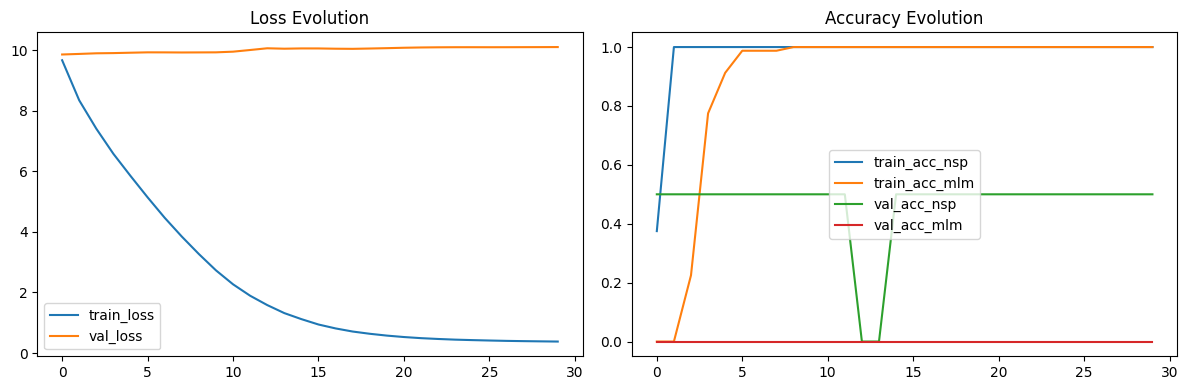

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['nsp_acc'], label='train_acc_nsp')  # NSP accuracy
plt.plot(history.history['mlm_acc'], label='train_acc_mlm')  # MLM accuracy
plt.plot(history.history['val_nsp_acc'], label='val_acc_nsp')  # Validation NSP accuracy
plt.plot(history.history['val_mlm_acc'], label='val_acc_mlm')  # Validation MLM accuracy
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()

<br><br>

### **6. pretrain 진행**
<br>

loss, accuracy 함수를 정의하고 Learning Rate 스케쥴링을 구현한 후, 10 Epoch까지 모델 학습을 시켜보세요.

학습을 진행할 때는 배치 사이즈에 유의하세요.

<br>

##### **계산 함수(loss, accuracy) 정의**

In [ ]:
def lm_loss(y_true, y_pred):
    """
    loss 계산 함수
    :param y_true: 정답 (bs, n_seq)
    :param y_pred: 예측 값 (bs, n_seq, n_vocab)
    """
    # loss 계산
    loss = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)(y_true, y_pred)
    # pad(0) 인 부분 mask
    mask = tf.cast(tf.math.not_equal(y_true, 0), dtype=loss.dtype)
    loss *= mask

    return loss * 20  # mlm을 더 잘 학습하도록 20배 증가 시킴

In [ ]:
def lm_acc(y_true, y_pred):
    """
    acc 계산 함수
    :param y_true: 정답 (bs, n_seq)
    :param y_pred: 예측 값 (bs, n_seq, n_vocab)
    """
    # 정답 여부 확인
    y_pred_class = tf.cast(K.argmax(y_pred, axis=-1), tf.float32)
    matches = tf.cast(K.equal(y_true, y_pred_class), tf.float32)
    # pad(0) 인 부분 mask
    mask = tf.cast(tf.math.not_equal(y_true, 0), dtype=matches.dtype)
    matches *= mask
    # 정확도 계산
    accuracy = K.sum(matches) / K.maximum(K.sum(mask), 1)

    return accuracy

<br>

##### **Learning Rate 스케줄링 구현**

In [ ]:
class CosineSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    """
    CosineSchedule Class
    """
    def __init__(self, train_steps=4000, warmup_steps=2000, max_lr=2.5e-4):
        """
        생성자
        :param train_steps: 학습 step 총 합
        :param warmup_steps: warmup steps
        :param max_lr: 최대 learning rate
        """
        super().__init__()

        assert 0 < warmup_steps < train_steps
        self.warmup_steps = warmup_steps
        self.train_steps = train_steps
        self.max_lr = max_lr

    def __call__(self, step_num):
        """
        learning rate 계산
        :param step_num: 현재 step number
        :retrun: 계산된 learning rate
        """
        state = tf.cast(step_num <= self.warmup_steps, tf.float32)
        lr1 = tf.cast(step_num, tf.float32) / self.warmup_steps
        progress = tf.cast(step_num - self.warmup_steps, tf.float32) / max(1, self.train_steps - self.warmup_steps)
        lr2 = 0.5 * (1.0 + tf.math.cos(math.pi * progress))
        return (state * lr1 + (1 - state) * lr2) * self.max_lr

In [ ]:
# Learning rate 계산하기
import math

test_schedule = CosineSchedule(train_steps=4000, warmup_steps=500)
lrs = []
for step_num in range(4000):
    lrs.append(test_schedule(float(step_num)).numpy())

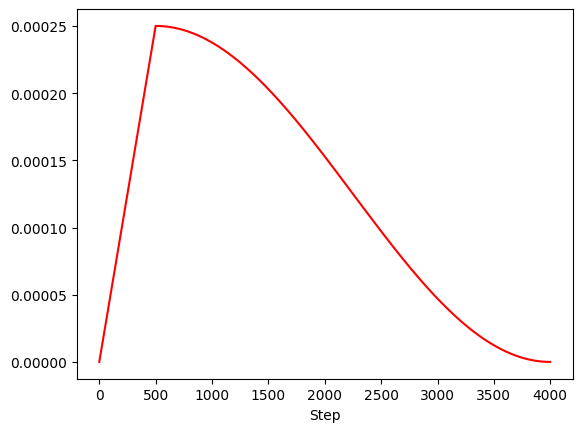

In [ ]:
# Learning rate 변화 그리기
plt.plot(lrs, 'r-', label='learning_rate')
plt.xlabel('Step')
plt.show()

<br>

이제 모델을 실제로 빌드해 봅시다.

<br>

In [ ]:
# 모델 생성

In [ ]:
pre_train_model = build_model_pre_train(config)

In [ ]:
pre_train_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 enc_tokens (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 segments (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 bert (BERT)                 ((None, 256),                4485632   ['enc_tokens[0][0]',          
                              (None, None, 8007))                    'segments[0][0]']            
                                                                                                  
 pooled_nsp (PooledOutput)   (None, 2)                    66304     ['bert[0][0]']          

<br>

##### **모델 학습**

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
# optimizer
train_steps = math.ceil(len(pre_train_inputs[0]) / batch_size) * epochs
print("train_steps:", train_steps)
learning_rate = CosineSchedule(train_steps=train_steps, warmup_steps=max(100, train_steps // 10))
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

train_steps: 20000


In [ ]:
# compile
pre_train_model.compile(loss=(tf.keras.losses.sparse_categorical_crossentropy, lm_loss), optimizer=optimizer, metrics={"nsp": "acc", "mlm": lm_acc})

In [ ]:
# save weights callback
save_weights = tf.keras.callbacks.ModelCheckpoint(
    f"{model_dir}/bert_pre_train.hdf5",
    monitor="mlm_lm_acc",
    verbose=1,
    save_best_only=True,
    mode="max",
    save_freq="epoch",
    save_weights_only=True
)

In [ ]:
from keras import backend as K

# train
history = pre_train_model.fit(
    pre_train_inputs,  # input data
    pre_train_labels,  # labels
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[save_weights]  # Using the save_weights callback
)

Epoch 1/10
1998/2000 [============================>.] - ETA: 0s - loss: 19.5925 - nsp_loss: 0.6508 - mlm_loss: 18.9417 - nsp_acc: 0.5901 - mlm_lm_acc: 0.1085
Epoch 1: mlm_lm_acc improved from -inf to 0.10848, saving model to /content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models/bert_pre_train.hdf5
2000/2000 [==============================] - 58s 25ms/step - loss: 19.5911 - nsp_loss: 0.6507 - mlm_loss: 18.9404 - nsp_acc: 0.5901 - mlm_lm_acc: 0.1085
Epoch 2/10
1998/2000 [============================>.] - ETA: 0s - loss: 17.5359 - nsp_loss: 0.6223 - mlm_loss: 16.9136 - nsp_acc: 0.6193 - mlm_lm_acc: 0.1291
Epoch 2: mlm_lm_acc improved from 0.10848 to 0.12913, saving model to /content/drive/MyDrive/Colab/05_Colab_AIFFEL_2023/09_GOINGDEEPER/01_GD_NLP/Quest_07/bert_pretrained/models/bert_pre_train.hdf5
2000/2000 [==============================] - 49s 24ms/step - loss: 17.5359 - nsp_loss: 0.6223 - mlm_loss: 16.9136 - nsp_acc: 0.6193 - mlm_lm

<br><br>

### **7. 프로젝트 결과**
<br>

학습된 모델과 학습과정을 시각화해 보세요. NSP와 MLM의 loss가 안정적으로 수렴하나요?

모델이 작기 때문에 loss가 잘 수렴하지 않을 수도 있어요.

<br>

In [ ]:
# 훈련 결과 시각화

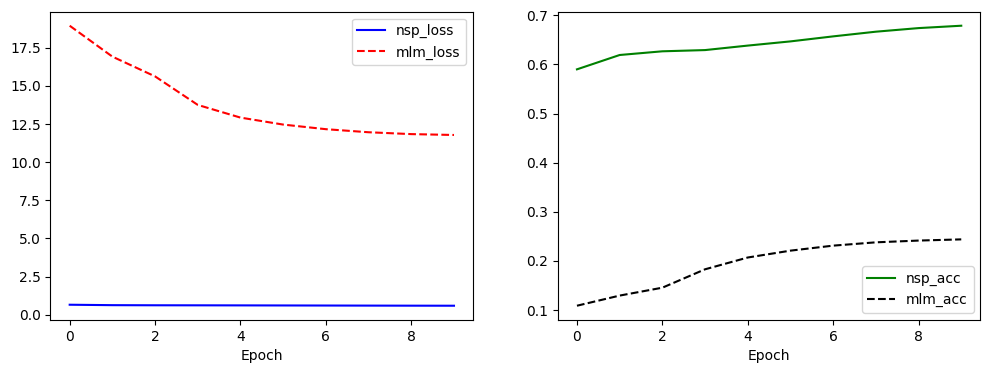

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['nsp_loss'], 'b-', label='nsp_loss')
plt.plot(history.history['mlm_loss'], 'r--', label='mlm_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['nsp_acc'], 'g-', label='nsp_acc')
plt.plot(history.history['mlm_lm_acc'], 'k--', label='mlm_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

<br><br>

# **21-2. 프로젝트 제출**
<br>

### **루브릭**
<br>

|<big>평가문항</big>|<big>상세기준</big>|
|:--|:--|
|<br>**1.  한글 코퍼스를 가공하여 BERT pretrain용 데이터셋을 잘 생성하였다.**<br><br> | <br>MLM, NSP task의 특징이 잘 반영된 pretrain용 데이터셋 생성과정이 체계적으로 진행되었다.<br><br> |
|<br>**2. 구현한 BERT 모델의 학습이 안정적으로 진행됨을 확인하였다.**<br><br> | <br>학습진행 과정 중에 MLM, NSP loss의 안정적인 감소가 확인되었다.<br><br> |
|<br>**3. 1M짜리 mini BERT 모델의 제작과 학습이 정상적으로 진행되었다.**<br><br> | <br>학습된 모델 및 학습과정의 시각화 내역이 제출되었다.<br><br> |


<br><br>

### **회고**
<br>

##### **문제상황**

+ training loss와 validation loss의 학습 정도와 그 변화 과정을 봤을 때, 학습은 제대로 이루어짐을 알 수 있지만,

+ validation loss의 감소의 변화 정도가 거의 없는 지점(Epoch 4~5)부터의 training loss와의 차이가 크게 나므로

+ 이 경우, 과적합(overfitting)이 발생함을 알 수 있고,

+ 따라서 모델이 새로운 데이터(검증 데이터)에는 잘 일반화되지 않음을 볼 수 있습니다.

<br>

##### **문제원인**

+ **데이터의 부족**: 모델의 복잡도(파라미터 수=4,551,936)에 비해, 최종적으로 학습에 사용된 학습 데이터의 양이 적었던 것이 주요 원인으로 판단됩니다.

<br>

##### **개선방법**

+ 사용 가능한 최대한의 학습 데이터로 학습을 한다면 과적합(overfitting) 문제가 개선이 될 것이고,

+ 그 개선 추이를 보고, 추가 데이터 확보와 확장(augmentation)을 더 시도할지

+ 정규화(L2 Regulization, Dropout 등)를 사용해 모델의 복잡도를 제한할지를 결정해 진행해보겠습니다.

<br>

##### **아쉬운 점**

+ 학습 시간이 오래 걸려, 시간 내 위 분석 원인을 개선할 방법들을 재대로 시도해보지 못하는 부분이 많이 아쉽습니다.